# 1. Метод инверсий 

Вам дан генератор равномерно распределенных на отрезке $[0, 1]$ случайных величин. Сгенерируйте соответствующее распределение из списка. 

### Выберите один из вариантов исходя из порядкого номера в списке группы. 
1. Гамма распределение с параметрами $(\alpha, \beta) = (7, 2)$
2. Распределение Стьюдента с $n=5$ степенями свободы.
3. Распределение Вейбулла с параметрами $(\lambda, k) = (8, 3)$
4. Распределение Хи-квадрат с $k = 3$ степенями свободы.

Функция распределния Вейбулла с параметрами $(\lambda, k) = (8, 3)$:

\begin{equation*}
 \begin{cases}
  F(x; \lambda=8, k=3) = 1 - e^{-(\frac{x}{8})^3}, x \geq 0 
   \\
   0, x < 0
 \end{cases}
\end{equation*}

Обратная функция к $F(x; \lambda=8, k=3)$:

$F^{-1}(x; \lambda=8, k=3) = 8(-\ln(1-x))^{\frac{1}{3}}$

Тогда $Y_i = F^{-1}(X_i, \lambda=8, k=3)$

In [107]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N = 500
X = np.random.uniform(size=N)###равномерные случайные величины
Y = 8*(-np.log(1-X))**(1/3) ###распределение полученной из равномерных случайных величин

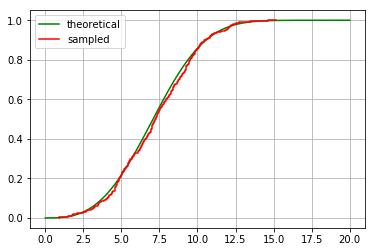

In [129]:
###изобразите функцию распределения теоретического распределения и по выборке
a, b = 0, 20
xx = np.linspace(a, b, N)
Z =  1 - np.exp(-(xx/8)**(3))# теоретическое распределение вычисленное по xx
plt.plot(xx, Z, c='green', label='theoretical');
# plt.plot(,Y, c='red', label='sampled')
plt.step(np.sort(Y) , (1+np.arange(Y.size)) / Y.size, label="sampled", color="r")
plt.grid()
plt.legend();

### Найдите расстояние Колмогорова-Смирнова  для полученного распределения для разных n
$$
D_n = sup_{x} |F_n(x) - F(x)|
$$
#### где $F_n(x)$ - эмперическая функция распределения.
#### Изобразите величину $D_n$, то есть степень согласия с исходным распределением.

In [125]:
n = np.arange(10,501, 50)###
x_n = np.array([np.sort(Y[:i]) for i in n])###
F_n = np.array([(1+np.arange(x_n[i].size)) / x_n[i].size  for i in range(x_n.shape[0])])##
F = np.array([1 - np.exp(-(xx/8)**(3)) for xx in x_n])
## Максимальный разрыв в точке скачка эмпирической функции распредлеения поэтому сравниваем предыдущее значение эмпирической с реальной в след точке
D_n = [np.max(np.abs(F_n[i][:-1] - F[i][1:])) for i in range(0,F.shape[0]) ]

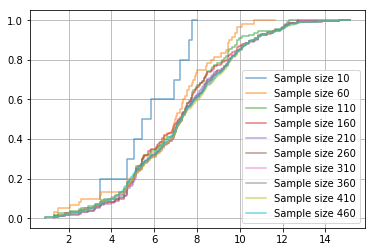

In [133]:
for i, _ in enumerate(n):
    plt.step(x_n[i], F_n[i], '-', alpha = 0.6, label='Sample size ' + str(n[i]))
plt.legend();
plt.grid()

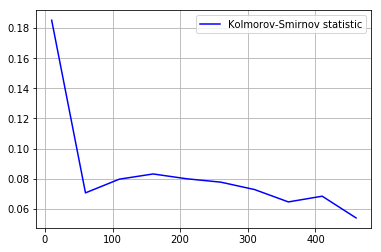

In [111]:
plt.plot(n, D_n, c='blue', label='Kolmorov-Smirnov statistic')
plt.legend();
plt.grid()

# 2. Стат оценки и их несмещенность, состоятельность, эффективность

#### Выберите 3 распределения (суммарное количество параметров не меньше 5 и постарайтесь не повторяться) и для каждого выполните задание.
1. Для каждого параметра вычислите оценку ОМП или ОММ. 
2. Оцените несмещенность, состоятельность. 
3. Посчитайте эффективность каждой оценки и постройте соответствующий график с изменение n - размера выборки. 

### Все распределения из списка есть в библиотеке numpy. 
1. beta(a, b[, size]) 	
2. chisquare(df[, size]) 	
3. dirichlet(alpha[, size]) 	
4. exponential([scale, size]) 	
5. f(dfnum, dfden[, size]) 	
6. gamma(shape[, scale, size]) 	
7. gumbel([loc, scale, size]) 	
8. laplace([loc, scale, size]) 	
9. logistic([loc, scale, size]) 	
10. lognormal([mean, sigma, size]) 	
11. normal([loc, scale, size]) 	
12. pareto(a[, size]) 	
13. poisson([lam, size]) 	
14. rayleigh([scale, size]) 	
15. uniform([low, high, size]) 	
16. vonmises(mu, kappa[, size]) 	
17. wald(mean, scale[, size]) 	
18. weibull(a[, size]) 

1. ОММ оценка для распределения Релея
$$
 \sigma = \overline{X} \sqrt{\frac{2}{\pi}}
$$
2. ОММ оценка для распределения Гумбеля
$$
\beta = \sqrt{\left[\frac{\overline{X^2} - \overline{X}^2}{J - \gamma^2} \right]}\\
\mu = \overline{X} -  \gamma \sqrt{\left[\frac{\overline{X^2} - \overline{X}^2}{J - \gamma^2} \right]}
$$
3. ОМП оценка для нормального распределния
$$
 \mu = \overline{x}\\
 \sigma^2 =  \frac{1}{N} \sum\limits_{i=1}^N{(x_i-\overline{x})^2}
$$

## Вывод первой оценки
$$
f(x, \sigma) = \frac{x}{\sigma^2}exp\left(\frac{-x^2}{2\sigma^2}\right)
$$
 
Первый момент распределения определяется
$$
E(X) = \sqrt{\frac{\pi}{2} }\sigma
$$

Тогда

$$
\overline{X} = \sqrt{\frac{\pi}{2} }\sigma \rightarrow \sigma = \overline{X} \sqrt{\frac{2}{\pi} }
$$

Посмотрим на смещенность этой оценки и состоятельность

Смещенность:
$$
E(\sqrt{\frac{2}{\pi}} \overline X) = E(\frac{1}{N}\sum\limits_{i=0}^N (\sqrt{\frac{2}{\pi}} X_i)) = \sqrt{\frac{2}{\pi}} \frac{1}{N} \sum\limits_{i=0}^N E(X_i) = \frac{N \sigma}{\sigma} = \sigma \rightarrow несмещена\\
$$

Состоятельность следует из ЗБЧ
$$
\frac{1}{N} \sum\limits_{i=0}^N (\sqrt{\frac{2}{\pi}} X_i) \rightarrow \sqrt{\frac{2}{\pi}} E(X) = \sigma\\
$$

## Вывод второй оценки
$$f(x) = \frac{1}{\beta} \exp{(-\frac{(x - \mu)}{\beta})} \exp{(-\exp{(-\frac{(x-\mu)}{\beta})})}$$ 

Первые два момента распределния:
$$
E(X) = \beta \gamma + \mu\\
E(X^2) = \beta^2 J + 2\beta \gamma \mu +\mu^2
$$,
где $\gamma = 0.577215$   $ а $    $J =1.978$
$$
\overline{X} =\beta \gamma + \mu\\
\overline{X^2} = \beta^2 J + 2\beta \gamma \mu +\mu^2\\
\overline{X^2} - \overline{X}^2 = \beta^2 J - \beta^2\gamma^2\\
\beta = \sqrt{\left[\frac{\overline{X^2} - \overline{X}^2}{J - \gamma^2} \right]}\\
\mu = \overline{X} -  \gamma \sqrt{\left[\frac{\overline{X^2} - \overline{X}^2}{J - \gamma^2} \right]}
$$

Оценим смещенность и состоятельность этих оценок:
Для $ \beta^2$ получим
$$
E(\frac{1}{J- \gamma^2}(\frac{1}{N} \sum\limits_{i=0}^N (X_i)^2 - \frac{1}{N^2}\sum\limits_{i,j=0}^N (X_i X_j))) = \frac{1}{J - \gamma^2}( \frac{1}{N} \sum\limits_{i=0}^N E(X_i)^2 - \frac{1}{N^2}\sum\limits_{i=0}^N E(X_i)^2 - \frac{1}{N^2}\sum\limits_{i\neq j}^N E(X_i)E(X_j)) = \frac{N-1}{N} \beta^2 
\rightarrow смещена
$$
Для $ \mu$ получим
$$
E(\overline{X} -  \gamma \sqrt{\left[\frac{\overline{X^2} - \overline{X}^2}{J - \gamma^2} \right]})  = E(\overline{X}) - \gamma E(\sqrt{\left[\frac{\overline{X^2} - \overline{X}^2}{J - \gamma^2} \right]}) \rightarrow
 смещена $$ так как перове слагаемое не смещено а второе смещено как показано выше

Обе оценки состоятельны следует из ЗБЧ

$$
\overline{X^2} - \overline{X}^2 \rightarrow E(X^2) - E(X)^2 \Rightarrow \overline{\beta} \rightarrow \beta\\
\frac{1}{N} \sum\limits_{i=0}^N (X_i) \rightarrow E(X) \Rightarrow \overline{\mu} \rightarrow \mu\\\\
$$


## Вывод третьей оценки
$$f(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$ 

Функция правдоподобия
$$
L(X, \mu, \sigma) = \prod\limits_{i=1}^{N}\frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}\\
\ln L(X,\mu, \sigma) = -N\ln(\sigma) - N\ln(\sqrt{2\pi}) + \frac{1}{2\sigma^2}\sum\limits_{i=1}^N{(x_i-\mu)^2}\\
\frac {\partial \ln L(X,\mu, \sigma)}{\partial \mu} = 0 \rightarrow \mu = \frac{1}{N} \sum\limits_{i=1}^N x_i = \overline{x}\\
\frac {\partial \ln L(X,\mu, \sigma)}{\partial \sigma} = 0 \rightarrow \sigma^2 = \frac{1}{N} \sum\limits_{i=1}^N{(x_i-\mu)^2} =  \frac{1}{N} \sum\limits_{i=1}^N{(x_i-\overline{x})^2}
$$

Оценим смещенность и состоятельность этих оценок:
Для $ \mu$ получим
$$
E(\overline X) = E(\frac{1}{N}\sum\limits_{i=0}^N (X_i)) = \frac{1}{N} \sum\limits_{i=0}^N E(X_i) = \frac{N \mu}{\mu} = \mu \rightarrow несмещена\\
$$

Для дисперсии:
$$
E(\frac{1}{N} \sum\limits_{i=0}^N (X_i)^2 - \frac{1}{N^2}\sum\limits_{i,j=0}^N (X_i X_j)) = \frac{1}{N} \sum\limits_{i=0}^N E(X_i)^2 - \frac{1}{N^2}\sum\limits_{i=0}^N E(X_i)^2 - \frac{1}{N^2}\sum\limits_{i\neq j}^N E(X_i)E(X_j) = E(X^2) - \frac{1}{N}E(X^2) - \frac{N-1}{N}E(X)^2 = \frac{N-1}{N}D(X) \rightarrow смещена
$$

Обе оценки состоятельны следует из ЗБЧ

$$
\frac{1}{N} \sum\limits_{i=0}^N (X_i) \rightarrow E(X) = \mu\\
\overline{X^2} - \overline{X}^2 \rightarrow E(X^2) - E(X)^2 = \sigma^2
$$


In [6]:
#Первое распределение
#несмщенность и состоятельность
#генерация случайных величин
n = 10000
n_sizes = np.arange(20,n,100)
#Ralyegh params
R_sigma = 0.5
X1 = np.random.rayleigh(scale=R_sigma, size=n)###
#Gumbel params
Gu_betta = 2
Gu_mu = 0.5
J = 1.978
gamma = 0.577
X2 = np.random.gumbel(loc=Gu_mu,scale=Gu_betta, size=n)###
#Gauss params
Ga_mu = 0.5
Ga_sigma = 0.2
X3 = np.random.normal(loc=Ga_mu, scale=Ga_sigma, size=n)###

In [7]:
# подсчет стат оценки
def rayleigh_eval(X1):
    return X1.mean() * np.sqrt(2/np.pi)
def gumbel_eval(X2):
    betta = np.sqrt(((X2*X2).mean()  - X2.mean()**2)/(J - gamma**2))
    return betta, X2.mean() - 0.577*betta
def normal_eval(X3):
    return X3.mean(), np.sqrt(1/X3.shape[0] * np.sum((X3 - X3.mean())**2))

a = rayleigh_eval(X1)
b,c = gumbel_eval(X2)
d,e = normal_eval(X3)


In [8]:
b,c

(1.979939386796428, 0.49865512385041133)

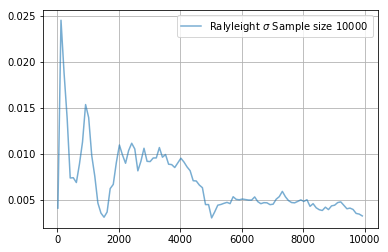

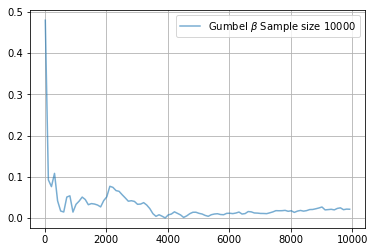

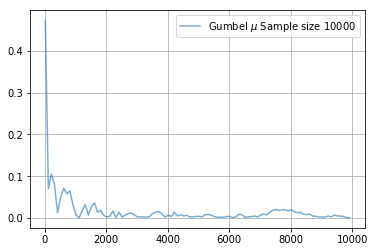

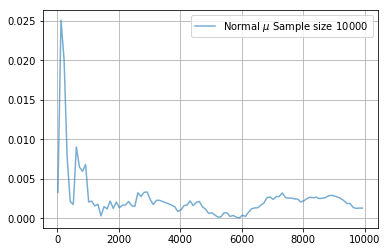

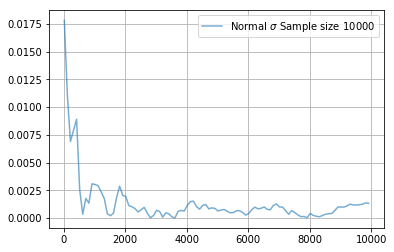

In [9]:
# # подсчет смещения
def bias_ralyleight(sigma, X1, n_sizes):
    return np.array([np.abs(sigma - rayleigh_eval(X1[:i])) for i in n_sizes])
def bias_gumbel(param, param_index, X2, n_sizes):
    return np.array([np.abs(param - gumbel_eval(X2[:i])[param_index]) for i in n_sizes])    
def bias_normal(param, param_index, X3, n_sizes):
    return np.array([np.abs(param - normal_eval(X3[:i])[param_index]) for i in n_sizes])    

# UnBias1 = U(a, params1)

UnBias1 = {r"Ralyleight $\sigma$" : bias_ralyleight(R_sigma, X1, n_sizes), r"Gumbel $\beta$" : bias_gumbel(Gu_betta,0,X2, n_sizes), "Gumbel $\mu$" :bias_gumbel(Gu_mu,1,X2,n_sizes),
        r"Normal $\mu$" : bias_normal(Ga_mu,0,X3,n_sizes),  r"Normal $\sigma$" : bias_normal(Ga_sigma,1,X3, n_sizes)}
for i in UnBias1:
    plt.plot(n_sizes, UnBias1[i], '-', alpha = 0.6, label= i + ' Sample size ' + str(n))
    plt.legend();
    plt.grid()
    plt.show()


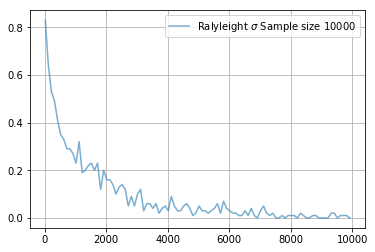

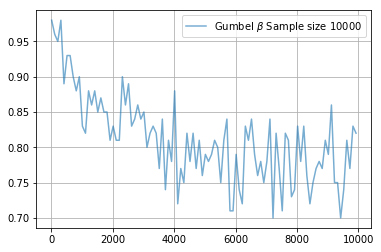

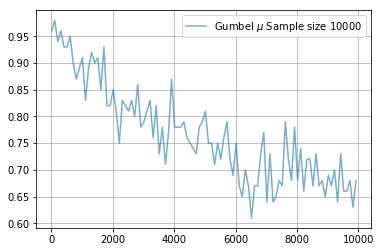

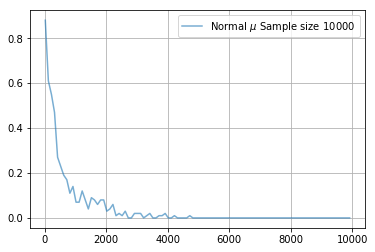

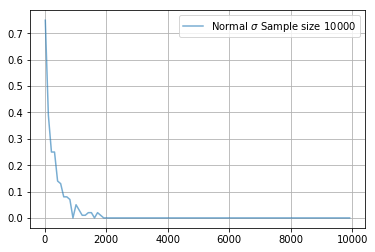

In [10]:
# подсчет состоятельности
# # подсчет смещения
def consistent_ralyleight(sigma, X1, n_sizes, epsilon=0.001, num_of_trials=10):
    res = np.zeros(n_sizes.shape)
    for i in range(num_of_trials):
        res += np.array([1 if np.abs(sigma - rayleigh_eval(X1[np.random.randint(X1.shape[0], size=i)])) > epsilon else 0 for i in n_sizes])    
    return res / num_of_trials
def consistent_gumbel(param, param_index, X2, n, epsilon=0.001, num_of_trials=10):
    res = np.zeros(n_sizes.shape)
    for i in range(num_of_trials):
        res += np.array([1 if np.abs(param - gumbel_eval(X2[np.random.randint(X2.shape[0], size=i)])[param_index]) > epsilon else 0 for i in n_sizes])    
    return res / num_of_trials
def consistent_normal(param, param_index, X3, n_sizes, epsilon=0.001, num_of_trials=10):
    res = np.zeros(n_sizes.shape)
    for i in range(num_of_trials):
        res += np.array([1 if np.abs(param - normal_eval(X3[np.random.randint(X3.shape[0], size=i)])[param_index]) > epsilon else 0 for i in n_sizes])    
    return res /num_of_trials
num_of_trials = 100
epsilon = 0.01
UniConsistent = {r"Ralyleight $\sigma$" : consistent_ralyleight(R_sigma, X1, n_sizes, epsilon, num_of_trials), r"Gumbel $\beta$" : consistent_gumbel(Gu_betta,0,X2, n_sizes, epsilon, num_of_trials), "Gumbel $\mu$" :consistent_gumbel(Gu_mu,1,X2,n_sizes, epsilon, num_of_trials),
        r"Normal $\mu$" : consistent_normal(Ga_mu,0,X3,n_sizes, epsilon, num_of_trials),  r"Normal $\sigma$" : consistent_normal(Ga_sigma,1,X3, n_sizes, epsilon, num_of_trials)}
# print(UniConsistent)
for i in UniConsistent:
#     print(UniConsistent[i])
    plt.plot(n_sizes, UniConsistent[i], '-', alpha = 0.6, label= i + ' Sample size ' + str(n))
    plt.legend();
    plt.grid()
    plt.show()

# P1 = P{|a - params1| > eps}
# ...
# for i, _ in enumerate(n):
#     plt.plot(_, UnBias1[i], '-', alpha = 0.6, label='Sample size ' + str(n))
# plt.legend();

# 3. Доверительные интервалы

#### Выбрать одно распределение с 2мя параметрами из списка выше (желательно не повторяться без нужды)
1. Построить доверительный интервал для каждого из параметров с $\alpha=0.05$.
2. Проиллюстрировать для разных n размеры доверительного интервала.
3. Построить доверительное множество для вектора параметров.
4. Проиллюстрировать для разных n размеры доверительного множества.

## Логистическое распределение 
$$
F(x, \mu, s) = \frac{1}{1 + e^{-\frac{(x-\mu)}{s}}}
$$

$$
E[X] = \mu\\
E[(X - \mu)^2] = \frac{\pi^2}{3} s^2\\
\sigma^2 = \frac{\pi^2}{3} s^2
$$

Найдем оверительный интервал для $\mu$:

$$\overline{X} \sim N(\theta, \frac{\sigma^2}{n}) \\  \sqrt{n}\frac{(\overline{X} - \mu)}{\sigma} \sim N(0,1)   \\
P(-z_{1-\frac{\alpha}{2}}  <  \sqrt{n}\frac{(\overline{X} - \mu)}{\sigma}  < z_{1-\frac{\alpha}{2}}) = 1 - \alpha \\ 
P(\overline{X} - z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} < \mu < \overline{X} + z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1 - \alpha 
$$
Где $z_{\alpha} - \alpha$ квантиль стандартного нормального распределения.

Аналогично воспользуемся ЦПТ чтобы найти доверительный интервал для $\sigma$
$$
\hat{s}^2 = \frac{\sum_i(X_i - \mu)^2}{n} \\
\hat{s}^2 \rightarrow  \sigma^2\\
\hat{s}^2 \sim  N(\sigma^2, \frac{VAR[(X_i - \mu)^2]}{n})\\
$$
Центральные моменты логистического распределения любого порядка вычисляются следующим образом:
$$E[(X-\mu)^n] = s^n \pi^n(2^n - 2) |{B_n}|$$
Где  $B_n$ числа Беррнулли. В частности:
$$VAR[(X_i - \mu)^2] = s^4\pi^4(2^4 - 2)|B_4| - s^4\pi^4(2^2-2)^2|B_2|^2 = 9\sigma^4\pi^4(\frac{14}{30} - \frac{4}{36}) = 9\sigma^4\pi^4(\frac{16}{45})$$

Тогда интервал для дисперсии:
$$
\frac{\hat{s}^2 - \sigma^2}{\sqrt{VAR[(X_i - \mu)^2]/n}} \sim N(0,1)\\
P(-z_{1-\frac{\alpha}{2}}  <  \sqrt{n}\frac{(\hat{s}^2 - \sigma^2)}{\sigma^2 \frac{4}{\sqrt{5}}}  < z_{1-\frac{\alpha}{2}}) = 1 - \alpha\\
P(-z_{1-\frac{\alpha}{2}} + \frac{\sqrt{5n}}{4}  <  \sqrt{n}\frac{(\hat{s}^2)}{\sigma^2 \frac{4}{\sqrt{5}}}  < z_{1-\frac{\alpha}{2}} +\frac{\sqrt{5n}}{4}) = 1 - \alpha\\
P( \frac{\hat{s}^2}{-z_{1-\frac{\alpha}{2}} + \frac{\sqrt{5n}}{4}}  >  \sigma^2 \frac{4}{\sqrt{5n}}  > \frac{\hat{s}^2} {z_{1-\frac{\alpha}{2}} +\frac{\sqrt{5n}}{4}}) = 1 - \alpha\\
P( \frac{\hat{s}^2 \frac{\sqrt{5n}}{4}}{-z_{1-\frac{\alpha}{2}} + \frac{\sqrt{5n}}{4}}  >  \sigma^2 >  \frac{\hat{s}^2 \frac{\sqrt{5n}}{4}}{z_{1-\frac{\alpha}{2}} + \frac{\sqrt{5n}}{4}} ) = 1 - \alpha
$$





В силу четности $N(0,1)$ верно  $z_{\alpha/2} = -z_{1-\alpha/2} = 1.96$


In [11]:
#генерация выборк 
Lo_mu = 2
Lo_s = 2
X = np.random.logistic(loc=Lo_mu, scale=Lo_s, size=n)######
# X = np.random.normal(loc=Lo_mu, scale=Lo_s, size=n)

In [12]:
#нахождение границ доверительного интервала 
n_sizes = np.arange(20, n/10,10).astype(int)###
z_a = 1.96

### Построим доверительный интервал для $\mu$ предполагая известным $s$ 

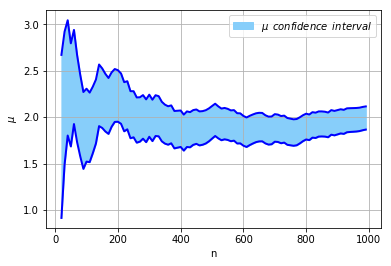

In [41]:
#доверительный интервал
mu_left =  np.array([X[:i].mean() - z_a*Lo_s/np.sqrt(i) for i in n_sizes])###
mu_right =  np.array([X[:i].mean() + z_a*Lo_s/np.sqrt(i) for i in n_sizes])###
plt.plot(n_sizes,mu_left, linewidth=2,color="b")
plt.plot(n_sizes,mu_right, linewidth=2,color="b")
plt.fill_between(n_sizes, mu_right,mu_left, color="#87CEFA", label="$\mu \hspace{0.5}confidence\hspace{0.5} interval$")
plt.legend()
plt.ylabel("$\mu$")
plt.xlabel("n");
plt.grid()


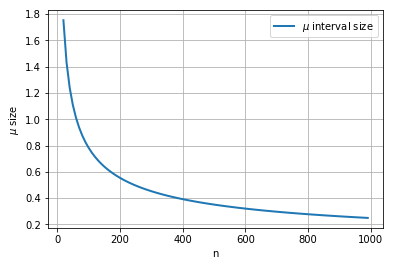

In [43]:
#размер интервала
plt.plot(n_sizes,mu_right - mu_left, label="$\mu$ interval size", linewidth=2)
plt.grid()
plt.legend()
plt.ylabel("$\mu$ size")
plt.xlabel("n");
plt.show()


### Построим доверительный интервал для $s$ предполагая известным $\mu$ 

In [15]:
S = (X - Lo_mu)**2
sigma_right = np.array([S[:i].mean() * np.sqrt(5*i/16)/ (-z_a +np.sqrt(5*i/16)) for i in n_sizes])###
sigma_left = np.array([S[:i].mean() * np.sqrt(5*i/16)/ (z_a +np.sqrt(5*i/16)) for i in n_sizes])###
s_left = np.sqrt(sigma_left*3)/np.pi
s_right=np.sqrt(sigma_right*3)/np.pi
# b = ###

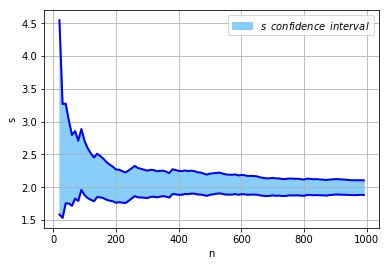

In [34]:
#доверительный интервал
plt.plot(n_sizes,s_left, linewidth=2,color="b")
plt.plot(n_sizes,s_right, linewidth=2,color="b")
plt.fill_between(n_sizes, s_right,s_left, color="#87CEFA", label="$s \hspace{0.5}confidence\hspace{0.5} interval$")
plt.legend()
plt.xlabel("n");
plt.ylabel("s")
plt.grid()


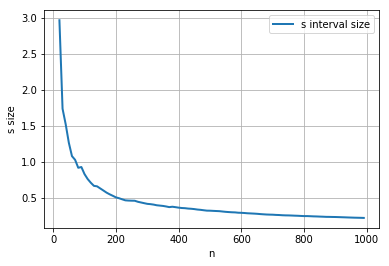

In [40]:
#размер интервала
plt.plot(n_sizes,s_right - s_left, label="s interval size", linewidth=2)
plt.grid()
plt.legend()
plt.ylabel("s size")
plt.xlabel("n");
plt.show()


## Построитм довертельное множество

In [18]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


In [19]:
mu_lower_bound = []
mu_higher_bound = []
bootstrap_trials = 1000
percent = 0.95
for size in n_sizes:
    mean_array = np.array([(np.random.choice(X[:size], X[:size].shape[0], replace=True)).mean() for i in range(bootstrap_trials)])
    mu_lower_bound.append(sorted(mean_array)[np.ceil(mean_array.shape[0] * (1-percent)).astype(int)])
    mu_higher_bound.append(sorted(mean_array)[np.floor(mean_array.shape[0] * percent).astype(int)])
    

In [20]:
##проверим корректность интервала на mu

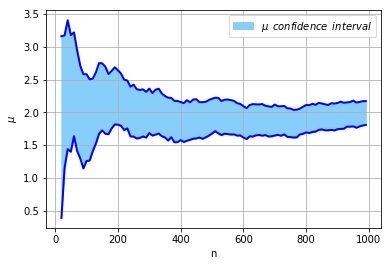

In [37]:
#доверительный интервал
plt.plot(n_sizes,mu_lower_bound, linewidth=2,color="b")
plt.plot(n_sizes,mu_higher_bound, linewidth=2,color="b")
plt.fill_between(n_sizes, mu_higher_bound,mu_lower_bound, color="#87CEFA", label="$\mu \hspace{0.5}confidence\hspace{0.5} interval$")
plt.legend()
plt.grid()
plt.ylabel("$\mu$")
plt.xlabel("n");


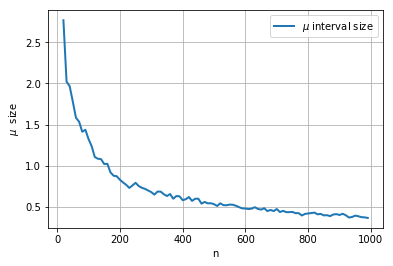

In [39]:
##размер интервала
res = [mu_higher_bound[i] - mu_lower_bound[i] for i in range(len(mu_lower_bound))]
plt.plot(n_sizes, res, linewidth=2, label="$\mu$ interval size")
plt.legend()
plt.ylabel("$\mu$  size")
plt.xlabel("n")
plt.grid()

In [23]:
## Найдем теперь само множество

In [24]:
def get_s_intervals(mean_arr, size,bootstrap_trials=1000):
    var_higher_bound = []
    var_lower_bound = []
    for mean in mean_arr: 
        var_array = []
        for i in range(bootstrap_trials):
            indexes = np.random.choice(np.arange(X[:n_sizes[1]].shape[0]), X[:n_sizes[1]].shape[0], replace=True)
            var_array.append(((X[indexes] - mean)**2).mean())
        var_lower_bound.append(sorted(var_array)[np.ceil((len(var_array)-1) * (percent)).astype(int)])
        var_higher_bound.append(sorted(var_array)[np.floor((len(var_array)-1) * (1-percent)).astype(int)])
    
    var_lower_bound = list(map(lambda x: np.sqrt(x*3)/np.pi, var_lower_bound))
    var_higher_bound=list(map(lambda x: np.sqrt(x*3)/np.pi, var_higher_bound))
    return var_lower_bound, var_higher_bound


In [68]:
def area_between_curve_calc(x,y1,y2):
    res = 0
    for i in range(len(x)-1):
        res += (y2[i] + y2[i+1] -y1[i] -y1[i+1])*(x[i+1]- x[i])/2
    return np.abs(res)

## Так как в 3d все будет плохо видно построим графики с большим шаком n

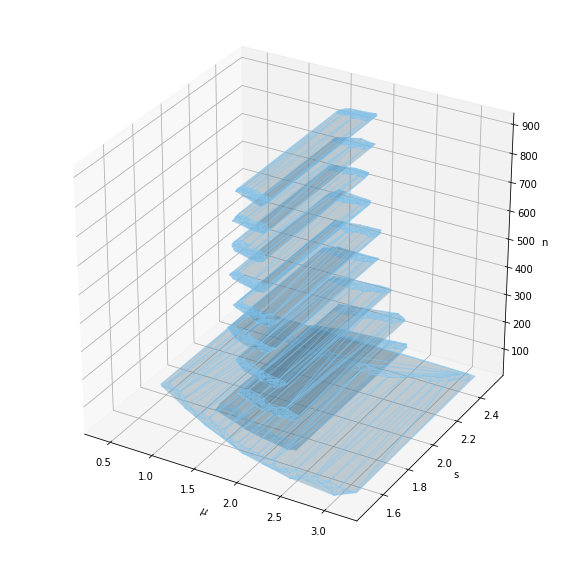

In [70]:
Y = X**2
bootstrap_trials = 1000
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
area = []
for i in range(0,len(mu_lower_bound),10):
    s_lower_bound=s_higher_bound=[]
    mean_arr =np.linspace(mu_lower_bound[i], mu_higher_bound[i], 100)
    s_lower_bound, s_higher_bound = get_s_intervals(mean_arr,n_sizes[i], bootstrap_trials)
    area.append(area_between_curve_calc(mean_arr,s_higher_bound,s_lower_bound))
#     ax.plot3D(mean_arr, s_lower_bound, n_sizes[i],color="b")
#     ax.plot3D(mean_arr, s_higher_bound, n_sizes[i], color="b")
    x = np.concatenate([mean_arr,mean_arr])
    y =np.concatenate([s_lower_bound,  s_higher_bound])
    ax.plot_trisurf(x,y,np.full(x.shape, n_sizes[i]),alpha=0.3, edgecolor='#87CEFA', color="#87CEFA")
    ax.set_xlabel('$\mu$')
    ax.set_ylabel('s')
    ax.set_zlabel('n')


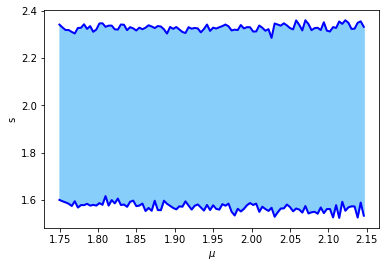

In [65]:
#Пример для разреза для n=920
plt.plot(mean_arr,s_higher_bound, linewidth=2, color="b")
plt.plot(mean_arr, s_lower_bound,linewidth=2,color="b")
plt.fill_between(mean_arr, s_higher_bound, s_lower_bound,color="#87CEFA" )
plt.xlabel("$\mu$")
plt.ylabel("s");
                 

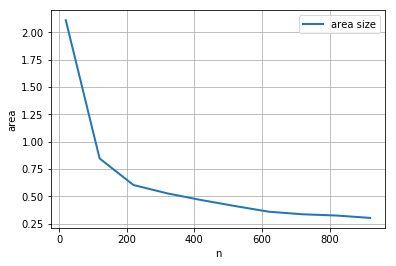

In [76]:
## Посмотрим как меняется площадь области от n
plt.plot(n_sizes[::10],area,linewidth=2, label="area size")
plt.grid()
plt.ylabel("area")
plt.xlabel("n")
plt.legend();


https://doi.org/10.1093/biomet/57.2.397